# Spain Wildfires

- Incendios forestales ocurridos en España entre los años 1968 y 2016.
- Estudio realizado sobre un dataset formado por 585400 observaciones y 51 atributos que se describen a continuación.

------------------------------------------------------------------------------------------------------------------------

**1. Data Cleaning and Preprocessing**

A. Data collection from Kaggle API:

***Note: To run all the code from the beginning first REMOVE the file 'incendios.csv' from src folder.**

In [30]:
import os
import subprocess
from shutil import copy2
from kaggle.api.kaggle_api_extended import KaggleApi

# Step 1: Move (copy) the kaggle.json file to the correct location
src_path = '/workspaces/Machine-Learning-Final-Project.FGM/.devcontainer/kaggle.json'
dst_path = os.path.expanduser('~/.kaggle/kaggle.json')

# Ensure the .kaggle directory exists and copy the kaggle.json file
os.makedirs(os.path.dirname(dst_path), exist_ok=True)
copy2(src_path, dst_path)

# Set permissions for the kaggle.json file
os.chmod(dst_path, 0o600)

# Step 2: Download the dataset again using Kaggle API
api = KaggleApi()
api.authenticate()

# Define dataset info
dataset_name = 'patrilc/wildfirespain'
zip_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip'
output_dir = './'

# Download dataset
api.dataset_download_files(dataset_name, path=output_dir, unzip=False)

# Step 3: Check if the zip file exists and extract it
if os.path.exists(zip_file_path):
    subprocess.run(['unzip', zip_file_path, '-d', output_dir], check=True)
    print(f"{zip_file_path} successfully extracted to {output_dir}")
else:
    print(f"{zip_file_path} does not exist in the specified path.")

# Step 4: List the contents of the current directory
directory_contents = os.listdir(output_dir)
print("Directory contents after extraction:")
for item in directory_contents:
    print(item)

Dataset URL: https://www.kaggle.com/datasets/patrilc/wildfirespain
Archive:  /workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip
  inflating: ./incendios.csv         
/workspaces/Machine-Learning-Final-Project.FGM/src/wildfirespain.zip successfully extracted to ./
Directory contents after extraction:
incendios.csv
utils.py
app.py
workflow.csv
explore.ipynb
wildfirespain.zip


In [31]:
import pandas as pd

file_path = "/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv"

incendios = pd.read_csv(file_path, delimiter=';')

pd.set_option('display.max_columns', None)

incendios


/tmp/ipykernel_38942/1022687328.py:5: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path, delimiter=';')


,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,comunidad,idprovincia,provincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,deteccion,extinguido,horadeteccion,mesdeteccion,duracion,primeranotificaciondesde112,iddetectadopor,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,intencionalidad,idcausante,idautorizacionactividad,idclasedia,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,direccionviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum,claseincendio,lugar,combustible,tipodefuego,tipodeataque
0,568679.0,2016,3,NaN,NaN,15,Islas Baleares,7,Islas Baleares,63,39.709,2.622,409.0,1,1.0,10/01/2016,10/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,290,NaN,0.0,1.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,17.0,49.0,20.0,Suroeste,0.20,0.0,20,18,0,31.0,466451.0,4397989.0,2.0,conato,excursionistas,bosques,superficie,directo
1,568680.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,157,42.466,0.695,1213.0,1,1.0,12/01/2016,12/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,1.0,322,NaN,0.0,3.0,1,no_intencionado,1,3.0,laborable,2.0,8.0,0.0,0.0,Norte,0.05,0.0,4,0,0,30.0,800159.0,4713460.0,2.0,conato,vertederos,pas_mat,superficie,directo
2,568681.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,125,42.141,-0.408,483.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,241,NaN,0.0,3.0,1,no_intencionado,1,4.0,festivo,3.0,8.0,40.0,4.0,Noreste,0.23,0.0,9,4,0,30.0,714747.0,4675882.0,2.0,conato,NaN,pastizal,superficie,directo
3,568682.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,52,41.689,0.178,196.0,1,1.0,17/01/2016,17/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,2,supuesto_no_intencionado,2,4.0,festivo,0.0,0.0,0.0,0.0,Norte,0.65,0.0,8,4,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
4,568683.0,2016,3,NaN,NaN,10,Aragon,22,Huesca,197,41.866,-0.461,399.0,1,1.0,22/01/2016,22/01/2016,tarde,enero,0,VERDADERO,ccff_seguridad,2.0,212,NaN,0.0,3.0,1,no_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.15,0.0,7,3,0,NaN,NaN,NaN,NaN,conato,viasferreas,pas_mat,superficie,directo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585394,1240141.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,249,39.729,-2.928,775.0,1,1.0,06/10/2016,06/10/2016,tarde,octubre,0,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,7.95,0.0,1,0,0,NaN,NaN,NaN,NaN,incendio,viasferreas,pastizal,superficie,directo
585395,1240142.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,128,39.569,-2.762,735.0,1,1.0,03/10/2016,04/10/2016,noche,octubre,1,VERDADERO,vigilante_fijo,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,1.58,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,pas_res,superficie,directo
585396,1240144.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,102,39.612,-2.281,815.0,1,1.0,03/10/2016,04/10/2016,tarde,octubre,1,VERDADERO,vigilante_fijo,1.0,210,NaN,0.0,3.0,2,supuesto_no_intencionado,2,3.0,laborable,0.0,0.0,0.0,0.0,Norte,4.10,0.0,3,2,0,NaN,NaN,NaN,NaN,incendio,otros,mat_res,superficie,directo
585397,1240145.0,2016,3,NaN,NaN,11,Castilla La Mancha,16,Cuenca,153,39.485,-2.745,716.0,1,1.0,03/10/2016,03/10/2016,tarde,octubre,0,FALSO,base_cdf,3.0,400,401.0,0.0,3.0,2,supuesto_intencionado,2,4.0,laborable,0.0,0.0,0.0,0.0,Norte,0.86,0.0,4,2,0,NaN,NaN,NaN,NaN,conato,otros,pas_mat,superficie,directo


In [32]:
# Get basic info about the dataset
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585399 entries, 0 to 585398
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   idpif                        585399 non-null  float64
 1   anio                         585399 non-null  int64  
 2   idestadopif                  585399 non-null  int64  
 3   probabilidadignicion         489389 non-null  float64
 4   idpeligro                    579862 non-null  float64
 5   idcomunidad                  585399 non-null  int64  
 6   comunidad                    585399 non-null  object 
 7   idprovincia                  585399 non-null  int64  
 8   provincia                    585399 non-null  object 
 9   idmunicipio                  585399 non-null  int64  
 10  latitud                      514051 non-null  float64
 11  longitud                     514051 non-null  float64
 12  altitud                      514051 non-null  float64
 13 

In [33]:
# Summary statistics
incendios.describe()

,idpif,anio,idestadopif,probabilidadignicion,idpeligro,idcomunidad,idprovincia,idmunicipio,latitud,longitud,altitud,nummunicipiosafectados,puntosinicioincendio,duracion,idgradoresponsabilidad,idcausa,idmotivacion,diastormenta,idinvestigacioncausa,idcertidumbrecausa,idcausante,idautorizacionactividad,diasultimalluvia,tempmaxima,humrelativa,velocidadviento,perdidassuperficiales,idnivelgravedadmaximo,numeromediospersonal,numeromediospesados,numeromediosaereos,huso,x,y,iddatum
count,5.853990e+05,585399.000000,585399.000000,489389.000000,579862.000000,585399.000000,585399.000000,585399.000000,514051.000000,514051.000000,514051.000000,585399.000000,6414.000000,585399.000000,6414.000000,585399.000000,302248.000000,9262.000000,6414.000000,585399.000000,585399.000000,6414.000000,206416.000000,282064.000000,277034.000000,262184.000000,585399.000000,6417.000000,585399.000000,585399.000000,585399.000000,220590.000000,2.205470e+05,2.205850e+05,3926.000000
mean,8.659738e+05,1997.324696,3.984993,15.044114,1.503778,6.791136,27.064163,65.697951,41.585214,-5.746319,447.324412,1.007296,1.148269,0.196531,2.779701,384.069342,409.132745,0.436623,1.604927,1.770384,1.886448,3.438572,14.609342,22.310227,52.931961,14.951481,12.767913,0.023064,27.764579,6.502818,1.813515,29.474559,5.165553e+05,4.609158e+06,2.028528
std,1.693967e+05,10.883810,0.121833,23.029899,0.873342,5.275141,11.840965,92.213738,1.991222,3.020347,321.710537,0.126325,1.234667,0.756895,1.006274,103.158710,25.077332,2.642960,0.918721,0.420586,0.317266,0.795600,20.132597,10.679793,20.174491,14.384499,155.310767,0.173253,243.440053,41.380794,13.821138,0.631843,1.453164e+05,2.409668e+05,0.290313
min,5.686790e+05,1968.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.756000,-17.998000,1.000000,1.000000,1.000000,0.000000,1.000000,100.000000,400.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.140600e+04,3.060500e+04,2.000000
25%,7.194475e+05,1990.000000,4.000000,0.000000,1.000000,3.000000,15.000000,15.000000,40.720000,-8.016000,158.000000,1.000000,1.000000,0.000000,2.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,3.000000,4.000000,17.000000,39.000000,5.000000,0.100000,0.000000,5.000000,0.000000,0.000000,29.000000,4.270655e+05,4.537110e+06,2.000000
50%,8.658160e+05,1998.000000,4.000000,0.000000,1.000000,4.000000,32.000000,43.000000,42.234000,-6.552000,431.000000,1.000000,1.000000,0.000000,3.000000,400.000000,400.000000,0.000000,1.000000,2.000000,2.000000,4.000000,9.000000,22.000000,53.000000,10.000000,0.700000,0.000000,9.000000,3.000000,0.000000,29.000000,5.476480e+05,4.673165e+06,2.000000
75%,1.012180e+06,2005.000000,4.000000,30.000000,2.000000,11.000000,36.000000,80.000000,42.866000,-4.182000,677.000000,1.000000,1.000000,0.000000,3.000000,400.000000,402.000000,0.000000,3.000000,2.000000,2.000000,4.000000,18.000000,28.000000,68.000000,20.000000,3.000000,0.000000,18.000000,5.000000,0.000000,30.000000,6.169630e+05,4.733550e+06,2.000000
max,1.240186e+06,2016.000000,4.000000,100.000000,4.000000,18.000000,51.000000,999.000000,43.740000,4.290000,1695.000000,21.000000,84.000000,153.000000,5.000000,600.000000,499.000000,85.000000,3.000000,2.000000,2.000000,4.000000,1430.000000,2132.000000,254.000000,250.000000,28879.100000,2.000000,82320.000000,8520.000000,3264.000000,71.000000,6.557209e+06,4.664850e+07,5.000000


In [34]:
def column_summary(incendios):
    summary_data = []
    
    for col_name in incendios.columns:
        col_dtype = incendios[col_name].dtype
        num_of_nulls = incendios[col_name].isnull().sum()
        num_of_non_nulls = incendios[col_name].notnull().sum()
        num_of_distinct_values = incendios[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = incendios[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = incendios[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_incendios = pd.DataFrame(summary_data)
    return summary_incendios


summary_incendios = column_summary(incendios)
display(summary_incendios)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,idpif,float64,0,585399,585399,"{1240186.0: 1, 568679.0: 1, 568680.0: 1, 56868..."
1,anio,int64,0,585399,49,"{1995: 25557, 2005: 25492, 2000: 23574, 1997: ..."
2,idestadopif,int64,0,585399,4,"{4: 576631, 3: 8752, 2: 15, 1: 1}"
3,probabilidadignicion,float64,96010,489389,99,"{0.0: 309071, 30.0: 38130, 40.0: 37194, 20.0: ..."
4,idpeligro,float64,5537,579862,5,"{1.0: 331401, 2.0: 112872, 3.0: 96233, 0.0: 32..."
5,idcomunidad,int64,0,585399,18,"{3: 253477, 17: 71775, 5: 46937, 4: 40210, 14:..."
6,comunidad,object,0,585399,18,"{'Galicia': 253477, 'Castilla y Leon': 71775, ..."
7,idprovincia,int64,0,585399,51,"{36: 79222, 32: 77598, 15: 59234, 33: 46937, 2..."
8,provincia,object,0,585399,51,"{'Pontevedra': 79222, 'Ourense': 77598, 'A Cor..."
9,idmunicipio,int64,0,585399,478,"{0: 67038, 34: 8966, 11: 8276, 50: 7889, 9: 76..."


In [35]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios.shape

                             Missing Values  Percentage Missing
idpif                                     0            0.000000
anio                                      0            0.000000
idestadopif                               0            0.000000
probabilidadignicion                  96010           16.400780
idpeligro                              5537            0.945851
idcomunidad                               0            0.000000
comunidad                                 0            0.000000
idprovincia                               0            0.000000
provincia                                 0            0.000000
idmunicipio                               0            0.000000
latitud                               71348           12.187927
longitud                              71348           12.187927
altitud                               71348           12.187927
nummunicipiosafectados                    0            0.000000
puntosinicioincendio                 578

(585399, 51)

In [36]:
# Identify columns to drop due to high percentage of missing values
columns_to_drop = [
    'puntosinicioincendio', 'idgradoresponsabilidad', 'diastormenta', 'idinvestigacioncausa', 'idautorizacionactividad', 'idnivelgravedadmaximo', 'huso', 'x', 'y', 'iddatum']

# Drop the specified columns
incendios = incendios.drop(columns=columns_to_drop, errors='ignore')

# Save the cleaned dataset back to the same file path
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios.to_csv(file_path, index=False)

# Print a confirmation message
print("Columns with high missing values removed successfully.")

incendios.shape

Columns with high missing values removed successfully.


(585399, 41)

In [37]:
import pandas as pd

# Load the original dataset
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/src/incendios.csv'
incendios = pd.read_csv(file_path)

# Columns to check for non-missing values
required_columns = ['direccionviento', 'velocidadviento', 'humrelativa', 'tempmaxima', 'diasultimalluvia']

# Filter the dataset to retain only rows with non-missing values in the specified columns
incendios_cleaned = incendios.dropna(subset=required_columns)

# Print confirmation and shape of the filtered dataset
print(f"Original dataset shape: {incendios.shape}")
print(f"Filtered dataset shape: {incendios_cleaned.shape}")
print("Rows with missing values in the specified columns have been removed successfully.")

# Save the filtered dataset back to a file if needed
filtered_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv'
incendios_cleaned.to_csv(filtered_file_path, index=False)
print(f"Filtered dataset saved to: {filtered_file_path}")

/tmp/ipykernel_38942/3203198066.py:5: DtypeWarning: Columns (31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  incendios = pd.read_csv(file_path)


Original dataset shape: (585399, 41)
Filtered dataset shape: (131359, 41)
Rows with missing values in the specified columns have been removed successfully.
Filtered dataset saved to: /workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv


In [38]:
import pandas as pd

# Check for missing values in the incendios dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
idpif                                     0            0.000000
anio                                      0            0.000000
idestadopif                               0            0.000000
probabilidadignicion                  15253           11.611690
idpeligro                              5534            4.212882
idcomunidad                               0            0.000000
comunidad                                 0            0.000000
idprovincia                               0            0.000000
provincia                                 0            0.000000
idmunicipio                               0            0.000000
latitud                                 526            0.400429
longitud                                526            0.400429
altitud                                 526            0.400429
nummunicipiosafectados                    0            0.000000
deteccion                               

(131359, 41)

En vez de deshacerme de las filas de las variables con bajo % de missing imput the median!!

In [40]:
import pandas as pd

# Load the original dataset
file_path = '/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv'
incendios = pd.read_csv(file_path)

# Impute missing values for numerical variables with the median
numerical_columns = ['latitud', 'longitud', 'altitud', 'diasultimalluvia', 'tempmaxima', 'velocidadviento']
for col in numerical_columns:
    median_value = incendios_cleaned[col].median()
    incendios_cleaned[col] = incendios_cleaned[col].fillna(median_value)

# Impute missing values for categorical variables with the mode
categorical_columns = ['probabilidadignicion', 'idmotivacion', 'humrelativa', 'direccionviento', 'tipodeataque', 'idpeligro', 'lugar', 'combustible', 'tipodefuego']
for col in categorical_columns:
    mode_value = incendios_cleaned[col].mode()[0]
    incendios_cleaned[col] = incendios_cleaned[col].fillna(mode_value)

# Save the cleaned dataset
cleaned_file_path = '/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv'
incendios_cleaned.to_csv(cleaned_file_path, index=False)

print("Data cleaning completed successfully!")
print(f"Cleaned dataset saved to: {cleaned_file_path}")

Data cleaning completed successfully!
Cleaned dataset saved to: /workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv


In [41]:
import pandas as pd

# Check for missing values in the incendios_cleaned dataframe
missing_values = incendios_cleaned.isnull().sum()

# Calculate the percentage of missing values per variable
missing_percentage = (missing_values / len(incendios_cleaned)) * 100

# Combine the absolute missing values and the percentage into one DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage
})

# Print the missing values per variable along with the percentage missing
print(missing_data)

incendios_cleaned.shape

                             Missing Values  Percentage Missing
idpif                                     0                 0.0
anio                                      0                 0.0
idestadopif                               0                 0.0
probabilidadignicion                      0                 0.0
idpeligro                                 0                 0.0
idcomunidad                               0                 0.0
comunidad                                 0                 0.0
idprovincia                               0                 0.0
provincia                                 0                 0.0
idmunicipio                               0                 0.0
latitud                                   0                 0.0
longitud                                  0                 0.0
altitud                                   0                 0.0
nummunicipiosafectados                    0                 0.0
deteccion                               

(113823, 41)

**Summary of variables and classification*

- Final Numerical Variables:

'probabilidadignicion', 'latitud', 'longitud', 'altitud', 'diasultimalluvia', 'tempmaxima', 'velocidadviento', 'anio', 'duracion', 'humrelativa', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos', 'nummunicipiosafectados'.

- Final Categorical Variables:

'idmotivacion', 'direccionviento', 'tipodeataque', 'idestadopif', 'idpeligro', 'idcomunidad', 'comunidad', 'idprovincia', 'provincia', 'idmunicipio', 'deteccion', 'extinguido', 'horadeteccion', 'mesdeteccion', 'primeranotificaciondesde112', 'iddetectadopor', 'idcausa', 'idcertidumbrecausa', 'intencionalidad', 'idcausante', 'idclasedia', 'claseincendio', 'lugar', 'combustible', 'tipodefuego'.

**Suggestions for Analysis**

- Retain for Analysis (Duration Prediction)

Numerical: 'probabilidadignicion', 'tempmaxima', 'humrelativa', 'velocidadviento', 'perdidassuperficiales', 'numeromediospersonal', 'numeromediospesados', 'numeromediosaereos'.

Categorical: 'idpeligro', 'idcomunidad', 'idprovincia', 'horadeteccion', 'direccionviento', 'claseincendio', 'tipodeataque', 'combustible', 'tipodefuego', 'idcausa', 'idclasedia'.

- Consider Simplifying or leaving on a side (Potentially redundant variables):

Potentially Redundant Variables
Numerical: 'anio', 'latitud', 'longitud', 'altitud', 'diasultimalluvia', 'nummunicipiosafectados'.

Categorical: 'comunidad', 'provincia', 'deteccion', 'extinguido', 'mesdeteccion', 'primeranotificaciondesde112', 'idmotivacion', 'lugar'.

**2. Analysis of univariate variables**

- Analysis of categorical variables

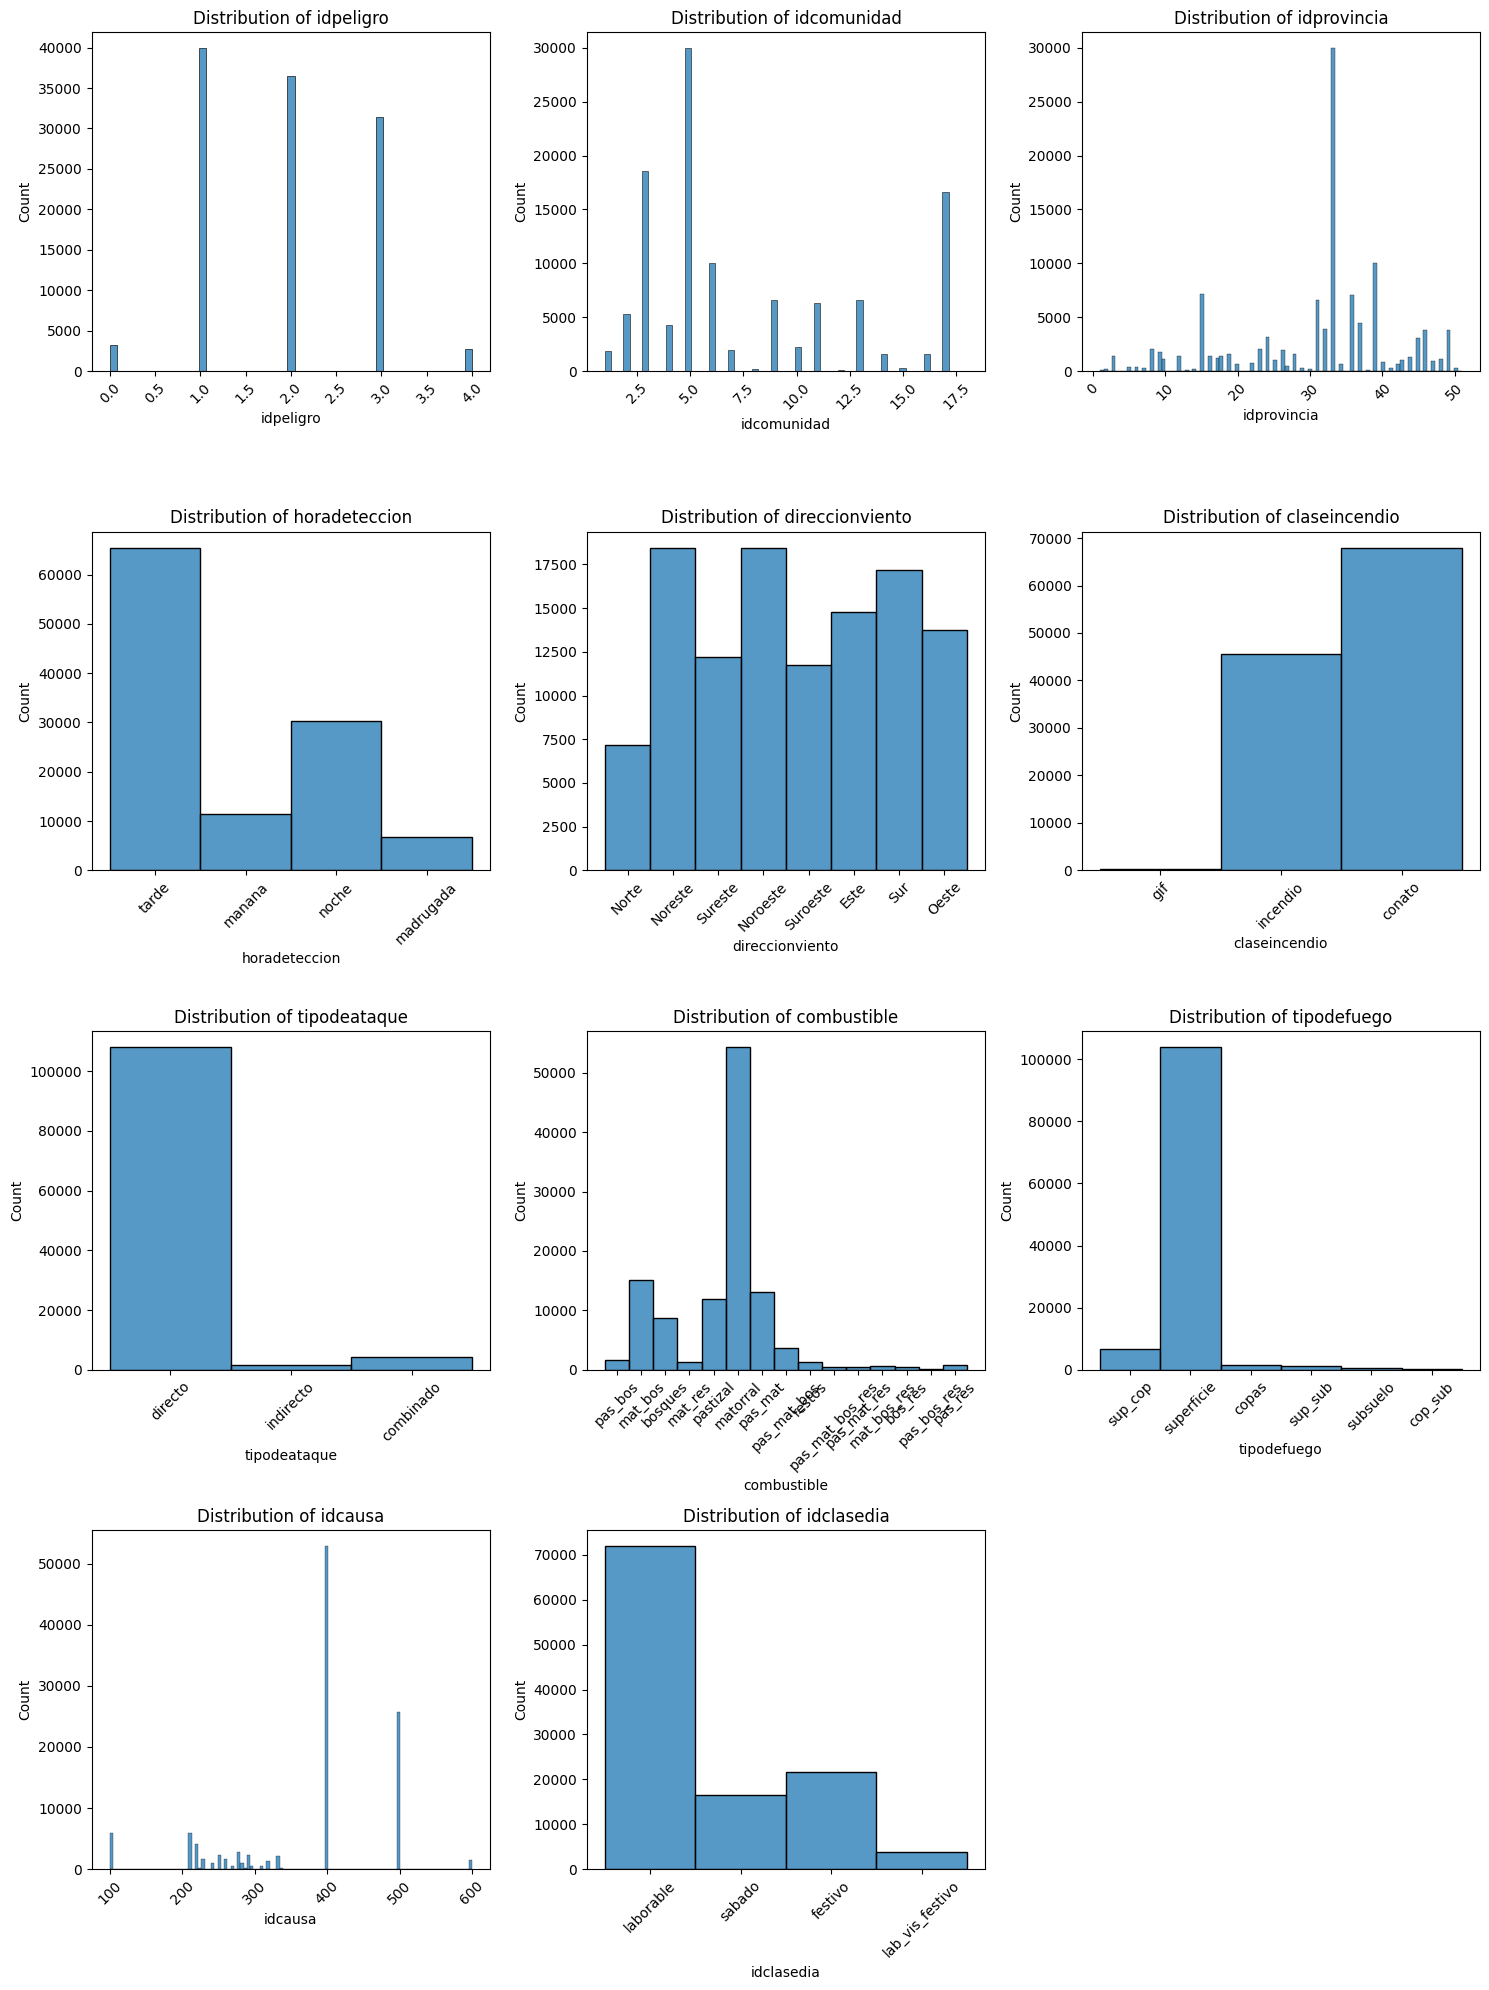

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical variables to analyze
categorical_vars = ['idpeligro', 'idcomunidad', 'idprovincia', 'horadeteccion',
                    'direccionviento', 'claseincendio', 'tipodeataque', 'combustible',
                    'tipodefuego', 'idcausa', 'idclasedia']

# Dynamically determine rows and columns for subplots
num_vars = len(categorical_vars)
cols = 3  # Fixed number of columns
rows = math.ceil(num_vars / cols)  # Calculate rows needed

# Create subplots
fig, axis = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust figure size dynamically

# Flatten axes array for easy iteration
axes = axis.flatten()

# Loop through the variables and plot
for ax, var in zip(axes, categorical_vars):
    sns.histplot(data=incendios_cleaned, x=var, ax=ax, kde=False)
    ax.set_title(f"Distribution of {var}")
    ax.set_ylabel("Count")
    ax.set_xlabel(var)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide unused subplots if any
for ax in axes[len(categorical_vars):]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

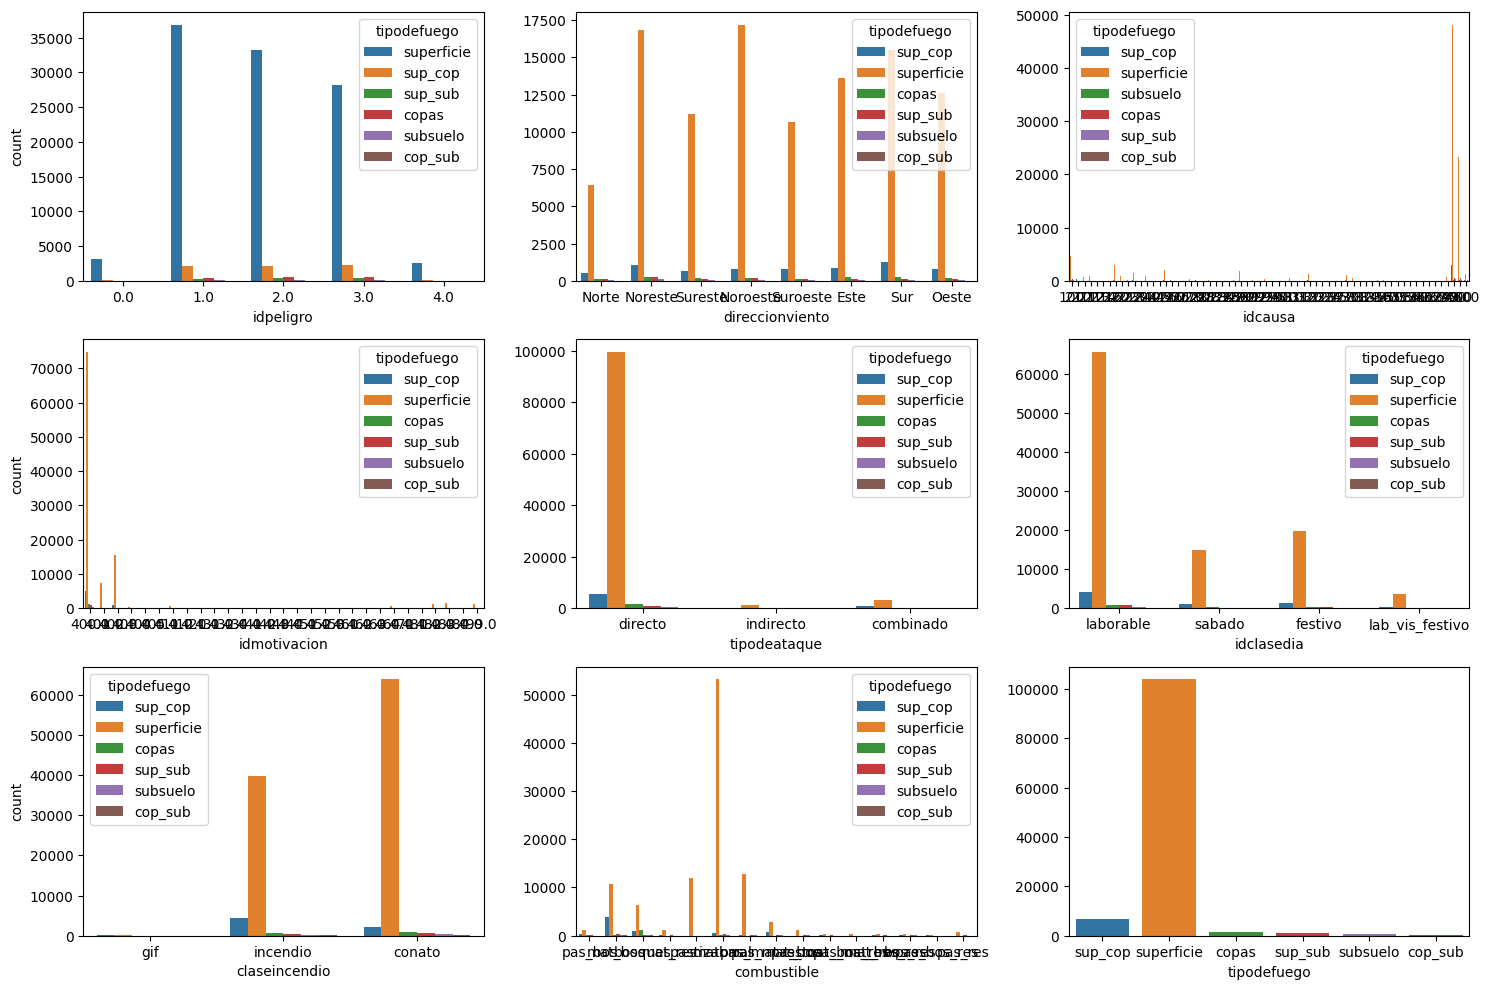

In [52]:
# Adjusting the number of subplots to fit 9 variables
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

# Creating count plots for each variable
sns.countplot(ax=axis[0, 0], data=incendios_cleaned, x="idpeligro", hue="tipodefuego")
sns.countplot(ax=axis[0, 1], data=incendios_cleaned, x="direccionviento", hue="tipodefuego").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=incendios_cleaned, x="idcausa", hue="tipodefuego").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=incendios_cleaned, x="idmotivacion", hue="tipodefuego")
sns.countplot(ax=axis[1, 1], data=incendios_cleaned, x="tipodeataque", hue="tipodefuego").set(ylabel=None)
sns.countplot(ax=axis[1, 2], data=incendios_cleaned, x="idclasedia", hue="tipodefuego").set(ylabel=None)
sns.countplot(ax=axis[2, 0], data=incendios_cleaned, x="claseincendio", hue="tipodefuego")
sns.countplot(ax=axis[2, 1], data=incendios_cleaned, x="combustible", hue="tipodefuego").set(ylabel=None)
sns.countplot(ax=axis[2, 2], data=incendios_cleaned, x="tipodefuego", hue="tipodefuego").set(ylabel=None)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

- Analysis of numerical variables:

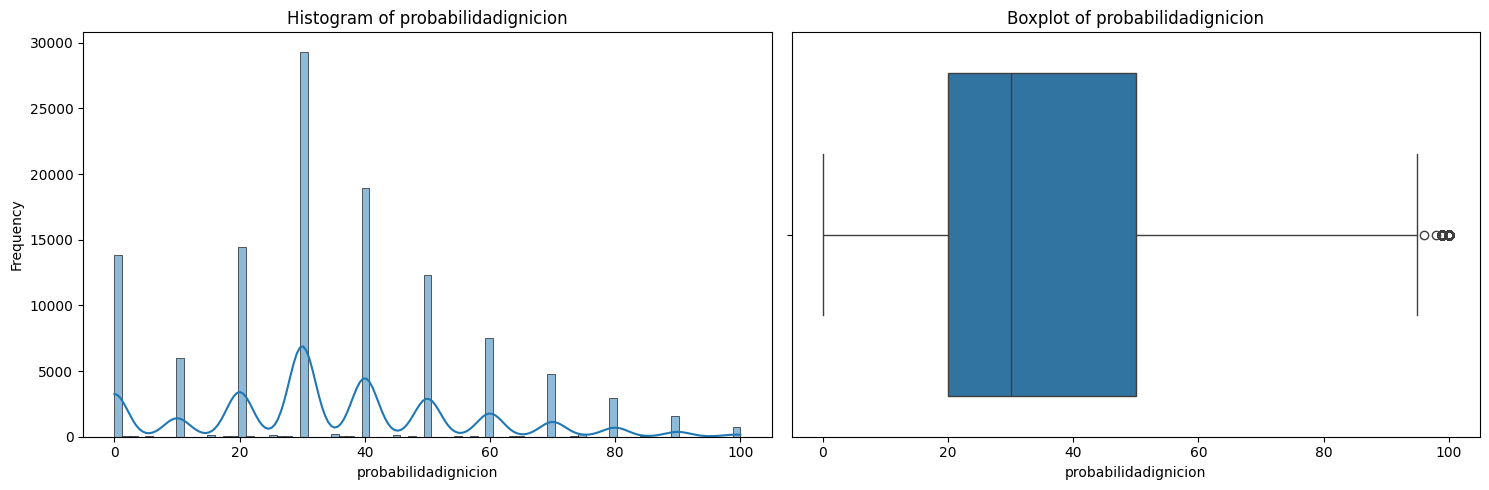

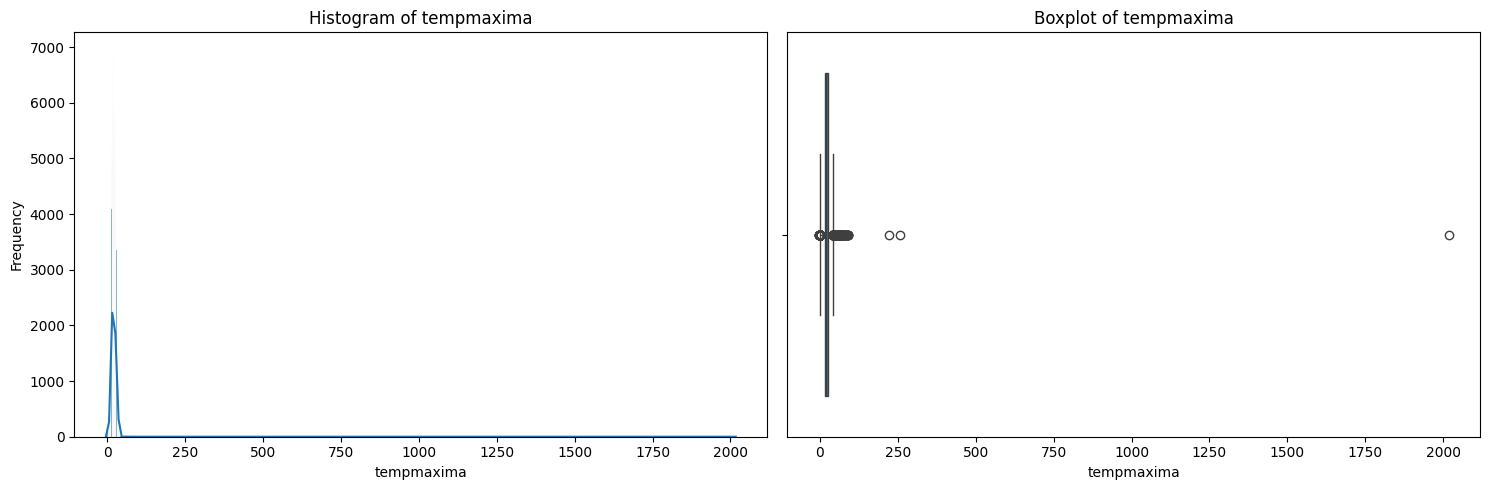

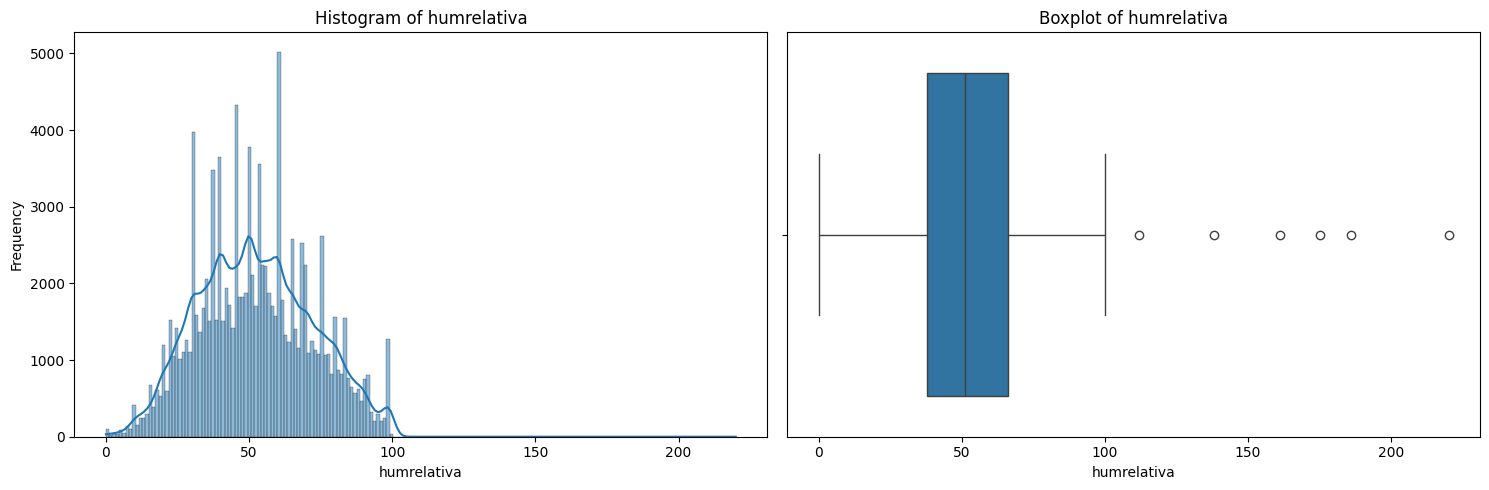

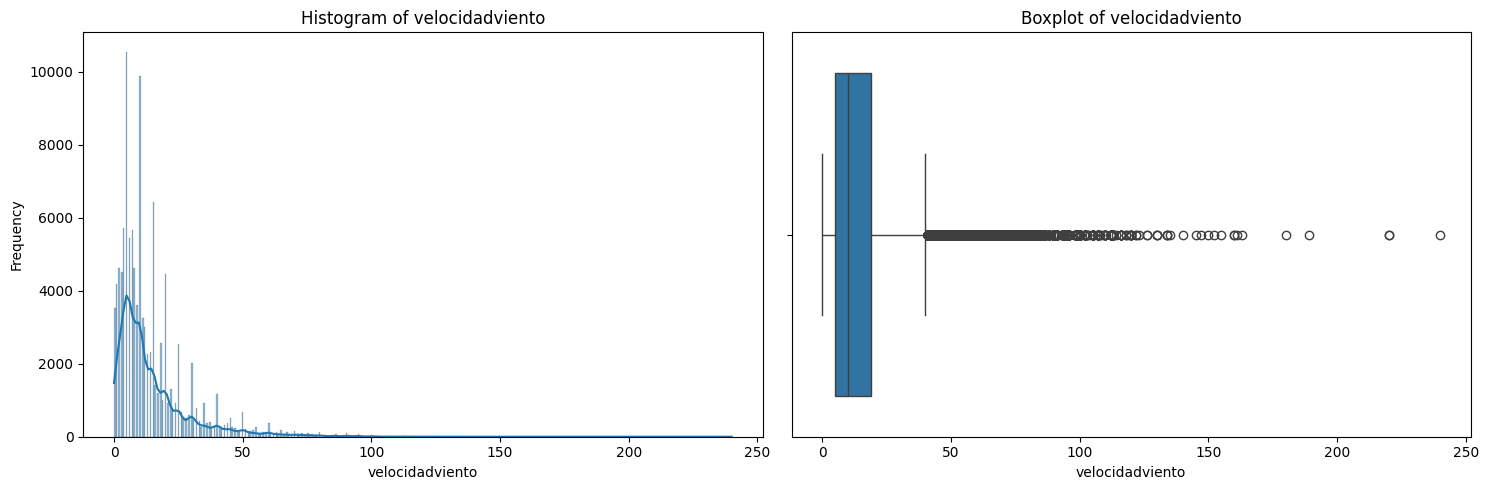

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
variables = ['probabilidadignicion', 'tempmaxima', 'humrelativa', 'velocidadviento']

# Remove rows with missing or problematic values for the selected variables
cleaned_data = incendios_cleaned[variables].dropna()

# Iterate through variables and plot them individually
for var in variables:
    # Create a new figure for each variable
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    # Histogram (left plot)
    sns.histplot(ax=axes[0], data=cleaned_data, x=var, kde=True)
    axes[0].set_title(f"Histogram of {var}")
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')
    
    # Boxplot (right plot)
    sns.boxplot(ax=axes[1], data=cleaned_data, x=var)
    axes[1].set_title(f"Boxplot of {var}")
    axes[1].set_xlabel(var)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


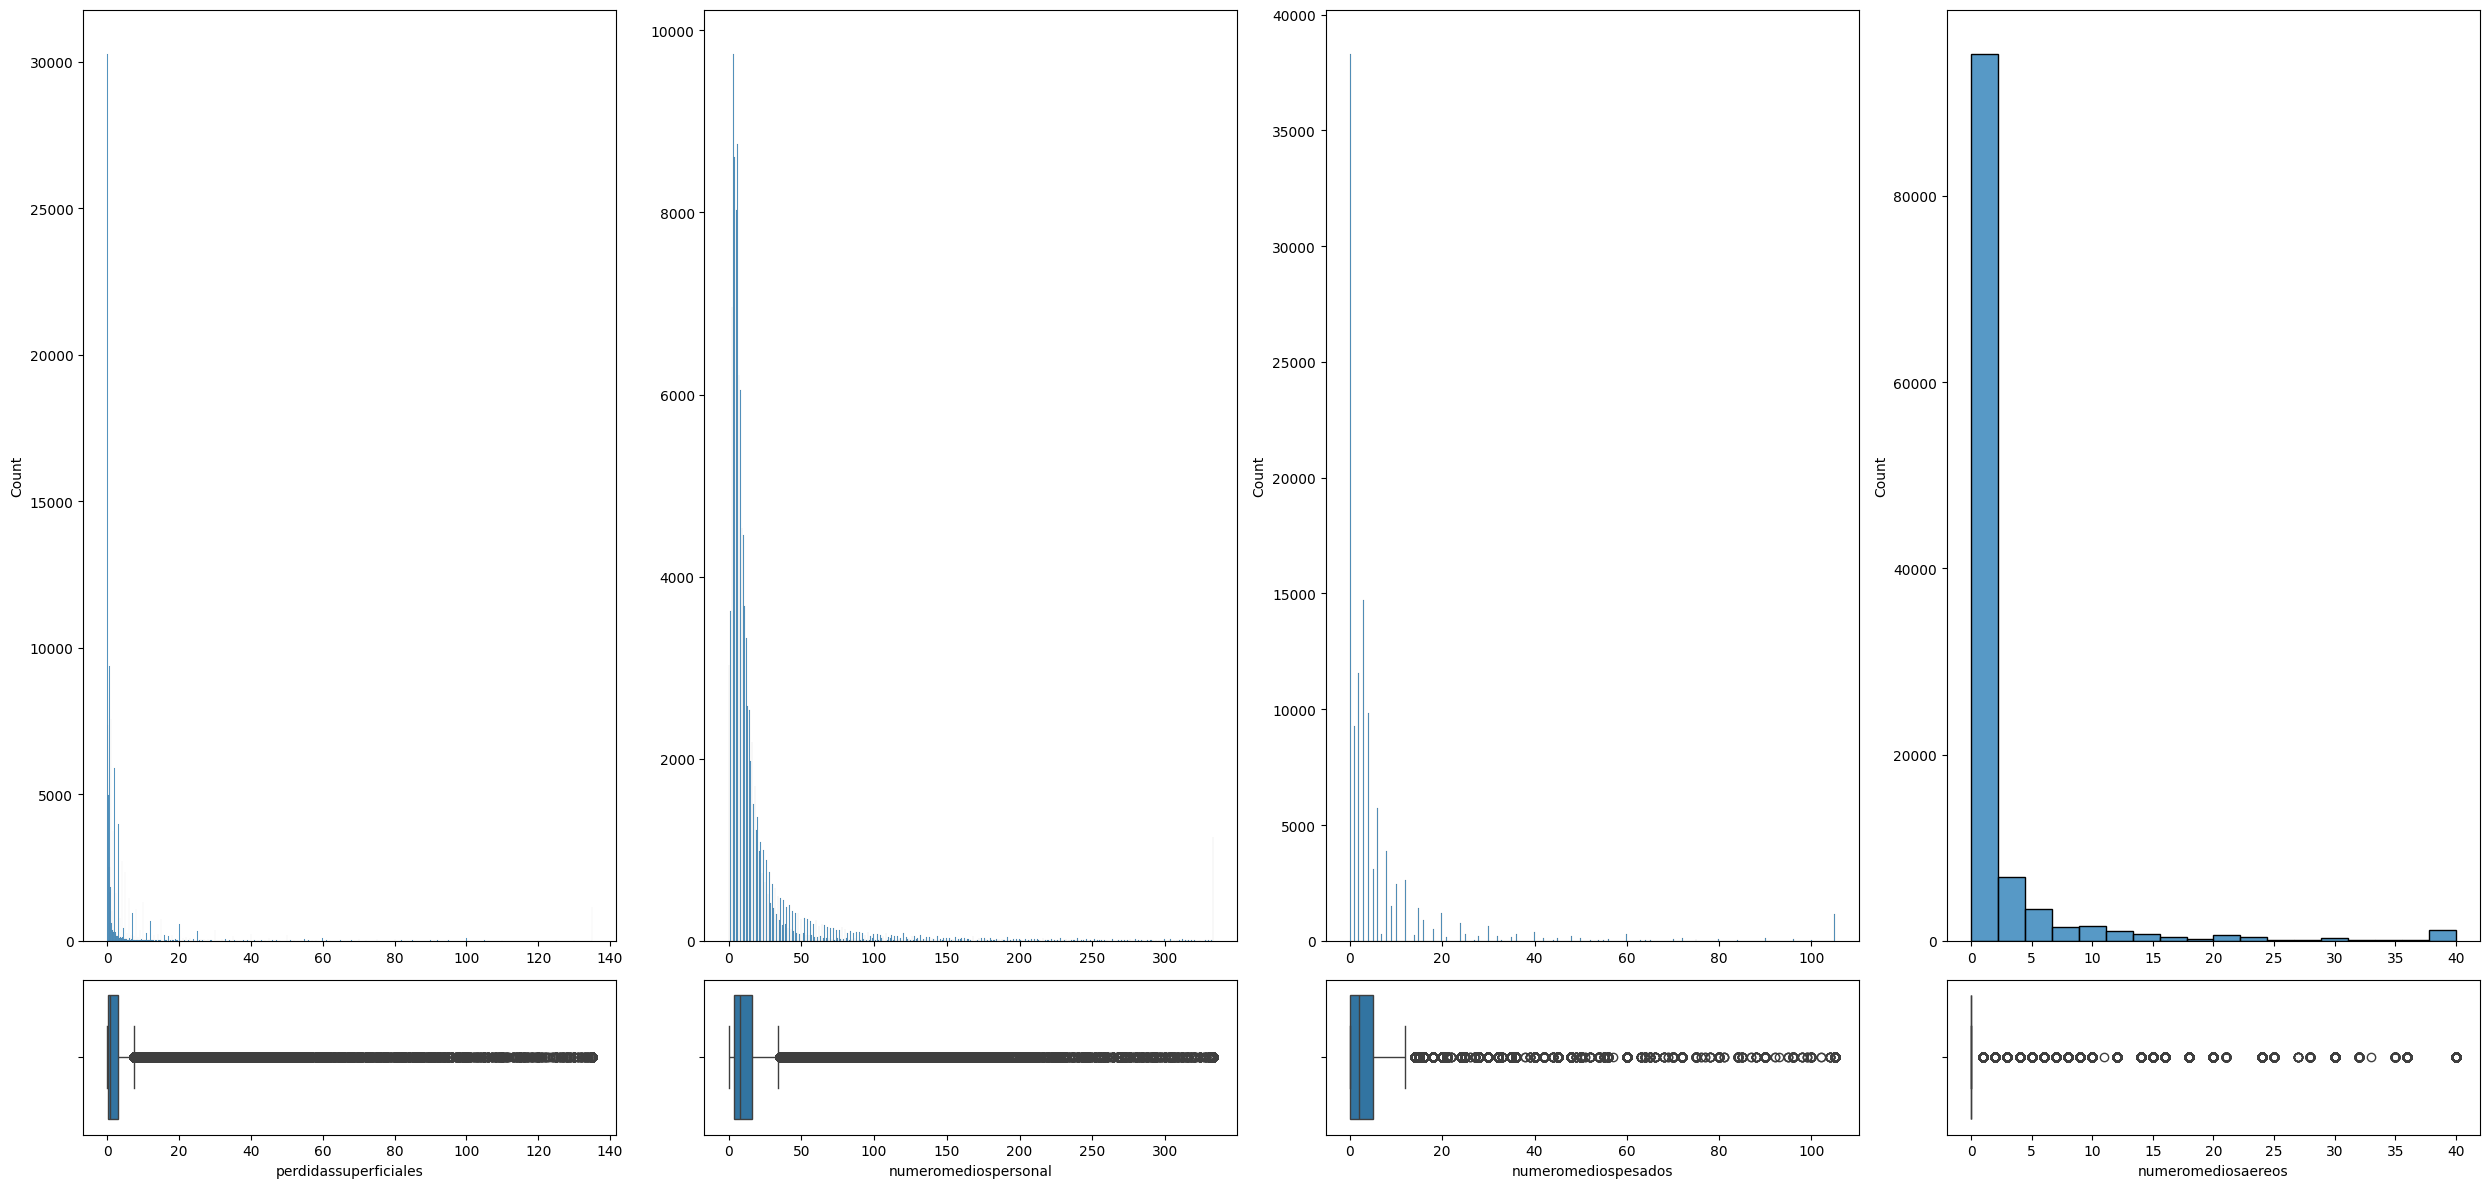

In [49]:
# Apply outlier clipping
for col in ['perdidassuperficiales', 'numeromediospersonal', 
            'numeromediospesados', 'numeromediosaereos']:
    incendios_cleaned[col] = incendios_cleaned[col].clip(upper=incendios_cleaned[col].quantile(0.99))

# Plot the histograms and boxplots
fig, axis = plt.subplots(2, 4, figsize=(15, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and boxplots
sns.histplot(ax=axis[0, 0], data=incendios_cleaned, x="perdidassuperficiales").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=incendios_cleaned, x="perdidassuperficiales")
sns.histplot(ax=axis[0, 1], data=incendios_cleaned, x="numeromediospersonal").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=incendios_cleaned, x="numeromediospersonal")
sns.histplot(ax=axis[0, 2], data=incendios_cleaned, x="numeromediospesados").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=incendios_cleaned, x="numeromediospesados")
sns.histplot(ax=axis[0, 3], data=incendios_cleaned, x="numeromediosaereos").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=incendios_cleaned, x="numeromediosaereos")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**3. Numerical - Categorical Analysis**

- Categorical Encoding for representation:

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables for analysis
numerical_vars = ['probabilidadignicion', 'diasultimalluvia', 'tempmaxima', 'velocidadviento', 
                  'humrelativa', 'perdidassuperficiales', 'numeromediospersonal', 
                  'numeromediospesados', 'numeromediosaereos', 'duracion']

categorical_vars = ['idpeligro', 'direccionviento', 'idcausa', 'idmotivacion', 'tipodeataque', 
                    'idclasedia', 'claseincendio', 'combustible', 'tipodefuego']

# Step 1. Encoding categorical variables and save them in the dataset
for var in categorical_vars:
    incendios_cleaned[f"{var}_n"] = pd.factorize(incendios_cleaned[var])[0]

# Save changes to the dataset
incendios_cleaned.to_csv("/workspaces/Machine-Learning-Final-Project.FGM/data/processed/incendio_cleaned.csv", index=False)

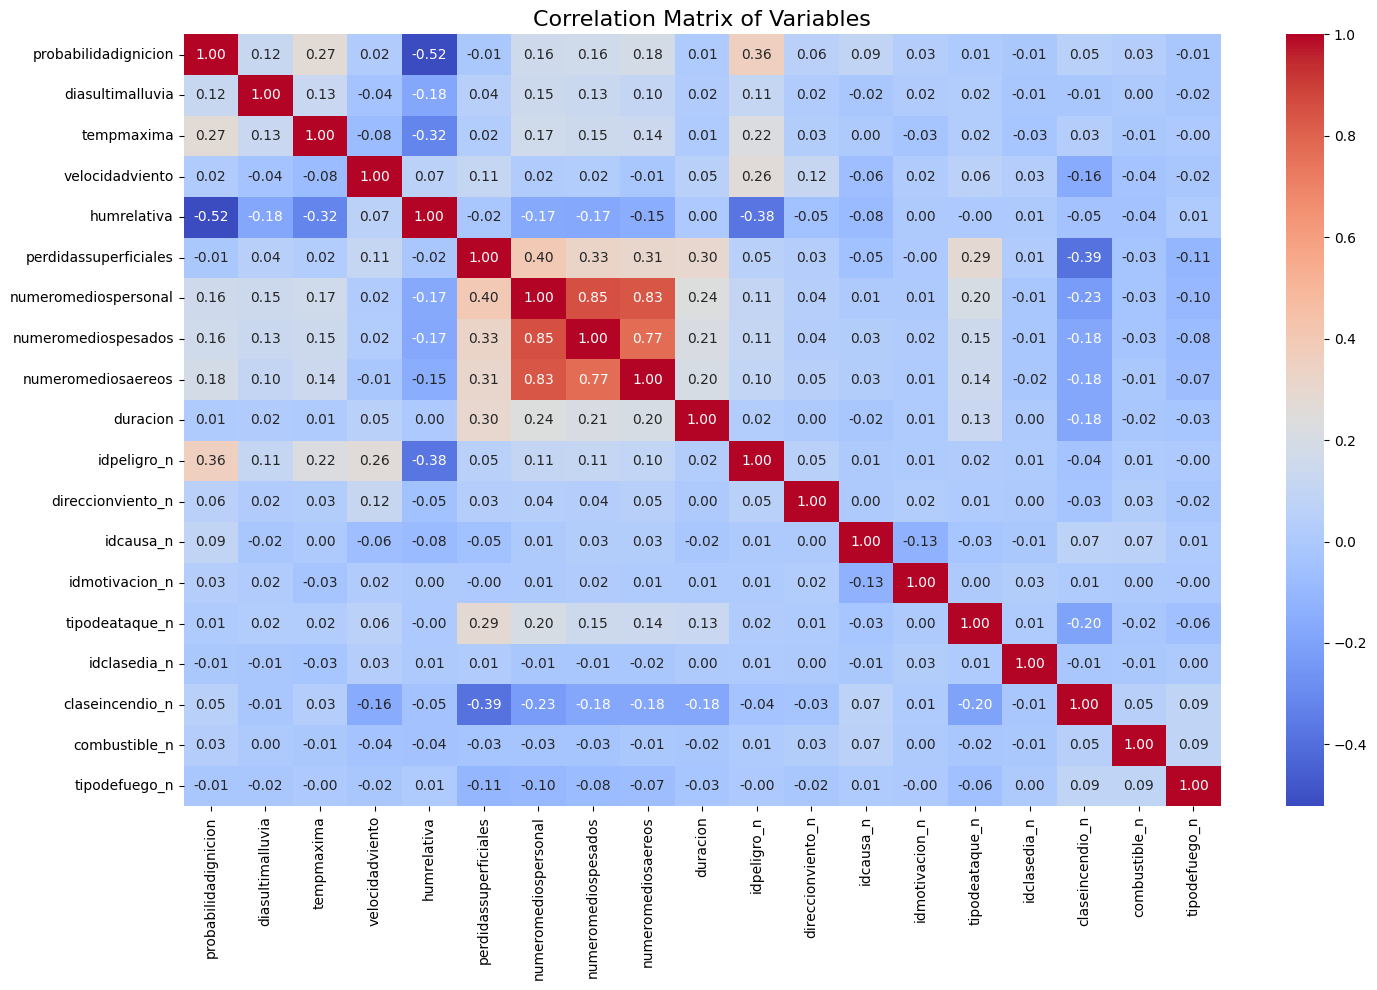

In [51]:
# Step 2: Select numerical and encoded categorical variables
analysis_vars = numerical_vars + [f"{var}_n" for var in categorical_vars]

# Step 3: Compute correlation matrix
correlation_matrix = incendios_cleaned[analysis_vars].corr()

# Step 4: Plot heatmap
fig, axis = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title and adjust layout
axis.set_title("Correlation Matrix of Variables", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

----------------------------------------------------------------------------------------